In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-mnist/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/amer_sign2.png
/kaggle/input/sign-language-mnist/amer_sign3.png
/kaggle/input/sign-language-mnist/sign_mnist_train.csv
/kaggle/input/sign-language-mnist/american_sign_language.PNG
/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv
/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv


In [2]:
# preprocessing library
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer

In [3]:
# data visualization library
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# deep learning library
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, BatchNormalization
from tensorflow.keras.layers import Dense, Flatten

In [5]:
# read train data
train_dataset = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv")

# read test data
test_dataset = pd.read_csv("/kaggle/input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv")

In [6]:
# sample train data
train_dataset.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [7]:
# check the size of the trianing data
print("There are {} rows and {} columns".format(train_dataset.shape[0], train_dataset.shape[1]))


There are 27455 rows and 785 columns


In [8]:
# sample test data
test_dataset.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53
5,21,72,79,87,101,115,124,131,135,139,...,187,189,192,193,194,194,194,195,195,194
6,10,93,100,112,118,123,127,131,133,136,...,173,175,177,178,180,180,181,181,181,183
7,14,177,177,177,177,177,178,179,179,178,...,232,223,224,224,223,221,221,221,220,219
8,3,191,194,196,198,201,203,204,205,205,...,43,57,78,64,47,62,65,62,62,68
9,7,171,172,172,173,173,173,173,173,172,...,199,199,198,196,195,194,183,85,65,124


In [9]:
# check the size of test data
print("There are {} rows and {} columns".format(test_dataset.shape[0], test_dataset.shape[1]))

There are 7172 rows and 785 columns


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


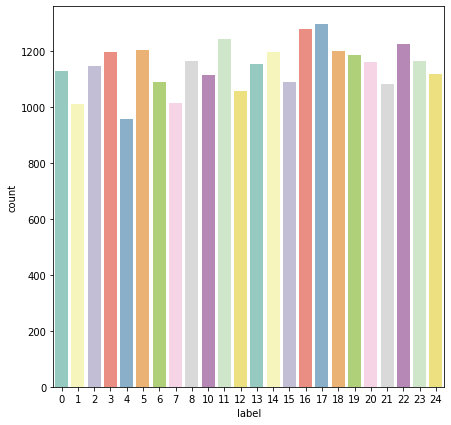

In [10]:
# check the amount of data present in each of the labels in training dataset
# we will do this through data visualization
plt.figure(figsize=(7,7))
sns.countplot(train_dataset['label'], palette='Set3')
plt.show()

The data is uniformly distributed

In [11]:
# define the independent variable
y_train = train_dataset['label']
y_test = test_dataset['label']

In [12]:
# delete the independent variable from both dataset
# dataset contains the pixel values only
del train_dataset['label']
del test_dataset['label']

In [13]:
# define the dependent variable and reshape it
# Using channel 1 to transform images into greyscale
# There are 784 pixel columns which makes it 28x28(=784)
x_train = train_dataset.values.reshape(-1, 28, 28, 1)
x_test = test_dataset.values.reshape(-1, 28, 28, 1)

print("Shape of x train data- {}".format(x_train.shape))
print("Shape of x test data- {}".format(x_test.shape))

Shape of x train data- (27455, 28, 28, 1)
Shape of x test data- (7172, 28, 28, 1)


In [14]:
# divide with 255 to scale values down to range of 0...1
x_train_preprocessed = x_train / 255
x_test_preprocessed = x_test / 255

In [15]:
# tranforming multi class data to 0/1 array data (similar to one hot encoding)
label_binarizer_obj = LabelBinarizer()
y_train_preprocessed = label_binarizer_obj.fit_transform(y_train)
y_test_preprocessed = label_binarizer_obj.fit_transform(y_test)
print("Shape of y train data- {}".format(y_train_preprocessed.shape))
print("Shape of y test data- {}".format(y_test_preprocessed.shape))

Shape of y train data- (27455, 24)
Shape of y test data- (7172, 24)


In [16]:
# sample y data
y_train_preprocessed[0]

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

Data is ready!!

Variables are-

x_train_preprocessed

x_test_preprocessed

y_train_preprocessed

y_test_preprocessed

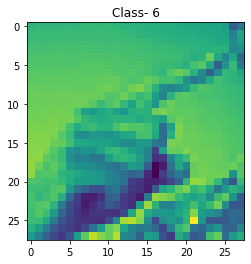

In [17]:
# sample image
plt.imshow(x_train_preprocessed[1])
plt.title("Class- {}".format(y_train_preprocessed[1].argmax()))
plt.show()

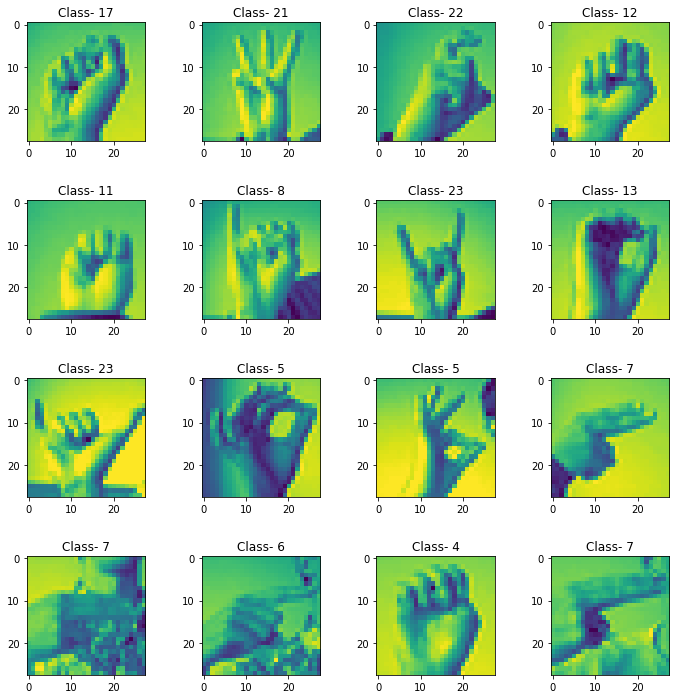

In [18]:
# some random images
import random
plt.figure(figsize=(12,12))
n = 0
for i in range(16):
    n += 1
    plt.subplot(4, 4, n)
    plt.subplots_adjust(hspace = 0.5)
    index = random.randint(0, y_train_preprocessed.shape[0])
    plt.imshow(x_train_preprocessed[index])
    plt.title("Class- {}".format(y_train_preprocessed[index].argmax()))
plt.show()
    


In [19]:
# Data augmentation
# Generate new image data to increase the training data size
# Alter the images by horizontally flipping it, shifting its height and width, zooming and rotating it
datagen_object = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range = 10,
                                                                height_shift_range = 0.2,
                                                                width_shift_range = 0.2,
                                                                zoom_range = 0.2,
                                                                horizontal_flip = True)


Create model, fit data and check accuracy. If accuracy is less, increase the size of the dataset by duplicating it using image data generator.

In [20]:
# model creation
sign_language_MNIST_model = tf.keras.models.Sequential()

sign_language_MNIST_model.add(Conv2D(128, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
sign_language_MNIST_model.add(BatchNormalization())
sign_language_MNIST_model.add(MaxPool2D(2, 2))


sign_language_MNIST_model.add(Conv2D(64, (3, 3), activation = 'relu'))
sign_language_MNIST_model.add(BatchNormalization())
sign_language_MNIST_model.add(MaxPool2D(2, 2))

sign_language_MNIST_model.add(Conv2D(32, (3, 3), activation = 'relu'))
sign_language_MNIST_model.add(BatchNormalization())
sign_language_MNIST_model.add(MaxPool2D(2, 2))

sign_language_MNIST_model.add(Flatten())

sign_language_MNIST_model.add(Dense(512, activation = 'relu'))
sign_language_MNIST_model.add(Dropout(0.2))
sign_language_MNIST_model.add(Dense(24, activation = 'softmax'))  # 24 number of output classes


In [21]:
# print the summary of the model, check trainable parameters
sign_language_MNIST_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 128)       512       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        73792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          1

In [22]:
# compile model
sign_language_MNIST_model.compile(optimizer = 'adam',
                                 loss = 'categorical_crossentropy',
                                 metrics = ['accuracy'])

In [23]:
# fit the train data
sign_language_MNIST_model.fit(datagen_object.flow(x_train_preprocessed, y_train_preprocessed, batch_size = 128), epochs = 20)

Epoch 1/20
215/215 [==============================] - 13s 38ms/step - loss: 2.5861 - accuracy: 0.2116
Epoch 2/20
215/215 [==============================] - 9s 43ms/step - loss: 1.1707 - accuracy: 0.6061
Epoch 3/20
215/215 [==============================] - 9s 40ms/step - loss: 0.8160 - accuracy: 0.7176
Epoch 4/20
215/215 [==============================] - 8s 39ms/step - loss: 0.6586 - accuracy: 0.7728
Epoch 5/20
215/215 [==============================] - 8s 38ms/step - loss: 0.5529 - accuracy: 0.8101
Epoch 6/20
215/215 [==============================] - 9s 40ms/step - loss: 0.4779 - accuracy: 0.8375
Epoch 7/20
215/215 [==============================] - 9s 41ms/step - loss: 0.4282 - accuracy: 0.8525
Epoch 8/20
215/215 [==============================] - 9s 40ms/step - loss: 0.3813 - accuracy: 0.8703
Epoch 9/20
215/215 [==============================] - 8s 39ms/step - loss: 0.3549 - accuracy: 0.8749
Epoch 10/20
215/215 [==============================] - 8s 38ms/step - loss: 0.3480 - accur

In [24]:
# accuracy on the test set
loss, accuracy = sign_language_MNIST_model.evaluate(x_test_preprocessed, y_test_preprocessed)
print("Accuracy on the test set- {}%".format(accuracy*100))

225/225 [==============================] - 1s 5ms/step - loss: 0.2188 - accuracy: 0.9129
Accuracy on the test set- 91.28555655479431%


In [ ]:
# trail 1 -> Accuracy = 86.58% || Highly Overfitting 
# Increase the nodes
# trail 2 -> Accuracy = 89.80% || Still Overfitting
# Data augmentation with BatchNormalization
# trail 3 -> Accuracy = 96.96% || More than the training accuracy
# Augmented Data without BacthNormalization
# trail 4 -> Accuracy = 86.53% || Highly Underfitting
# Augmented Data with BatchNormalization layer after activation layer
# trail 5 -> Accuracy = 92.81% || Test data accuracy 91.29% 

In [25]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(sign_language_MNIST_model)

In [26]:
tf_mdoel = converter.convert()

In [28]:
open('sign_language_MNIST_model.tflite', 'wb').write(tf_mdoel)

498300